In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
# Nota: substitua 'caminho_do_arquivo' pelo caminho real do seu arquivo CSV
caminho_do_arquivo = 'AirQuality.csv'
dados = pd.read_csv(caminho_do_arquivo, sep=';', decimal=',')

# Removendo colunas desnecessárias
dados.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

# Lidando com dados faltantes
dados.dropna(inplace=True)

# Verificando as primeiras linhas dos dados após o tratamento inicial
print(dados.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.786

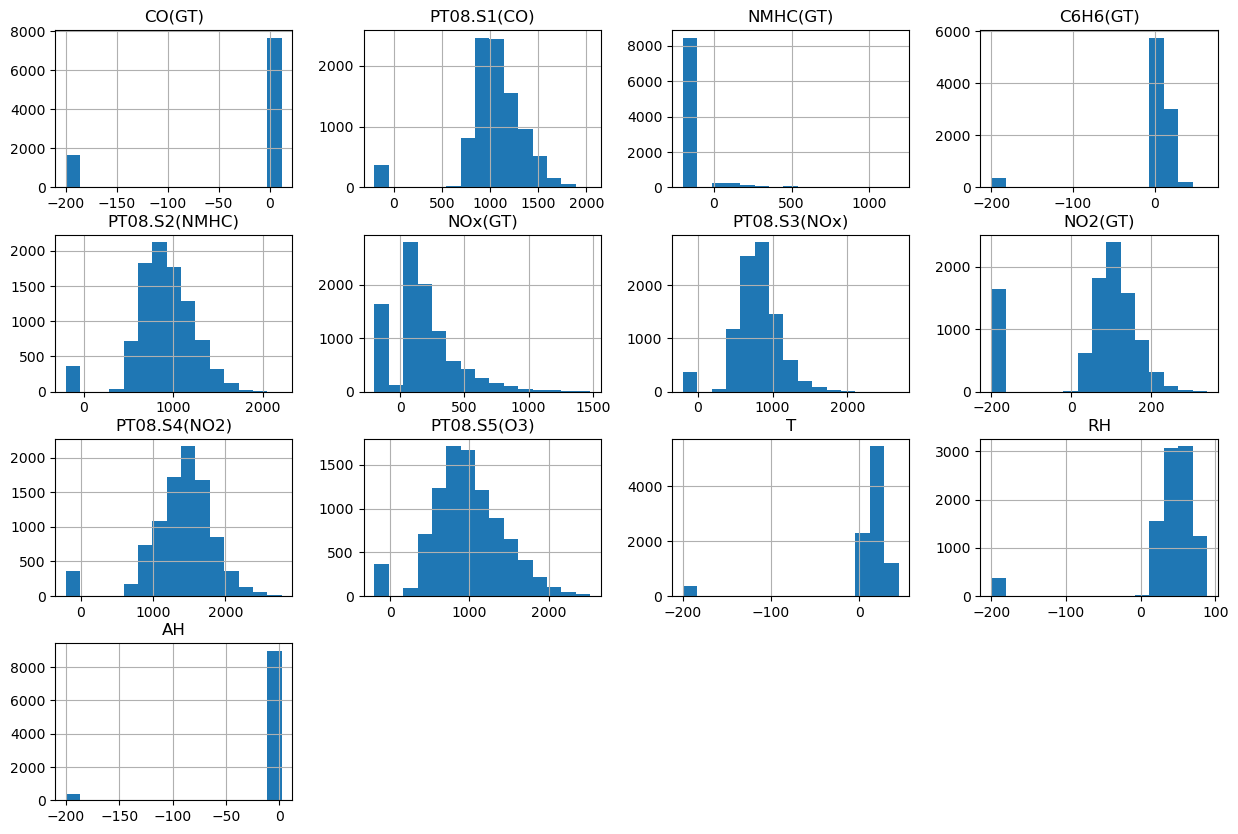

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

In [2]:
# Plotando histogramas
dados.hist(bins=15, figsize=(15, 10))
plt.show()

# Imprimindo estatísticas
print(dados.describe())

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Selecionando apenas as colunas numéricas para a normalização, excluindo 'Date' e 'Time'
colunas_numericas = dados.select_dtypes(include=[np.number]).columns
dados_normalizados = dados[colunas_numericas]
dados_normalizados = scaler.fit_transform(dados_normalizados)

# Convertendo de volta para DataFrame e mantendo os nomes das colunas
dados_normalizados = pd.DataFrame(dados_normalizados, columns=colunas_numericas)

# Verificando as primeiras linhas dos dados normalizados
print(dados_normalizados.head())

     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0  0.956111     0.696429  0.251980  0.803565       0.516156  0.217987   
1  0.953280     0.666071  0.224622  0.794084       0.478459  0.180465   
2  0.954224     0.715179  0.207343  0.792567       0.471831  0.197141   
3  0.954224     0.703571  0.201584  0.793326       0.475559  0.221560   
4  0.951392     0.657143  0.180706  0.783087       0.429163  0.197141   

   PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0      0.435657  0.579630      0.635966     0.539111  0.873262  0.862141   
1      0.476587  0.540741      0.591261     0.430408  0.872036  0.857984   
2      0.464794  0.581481      0.589916     0.467866  0.866312  0.879806   
3      0.448144  0.596296      0.599664     0.515241  0.862633  0.900589   
4      0.487340  0.585185      0.568067     0.481087  0.863451  0.899203   

         AH  
0  0.992715  
1  0.992556  
2  0.992678  
3  0.992858  
4  0.992869  


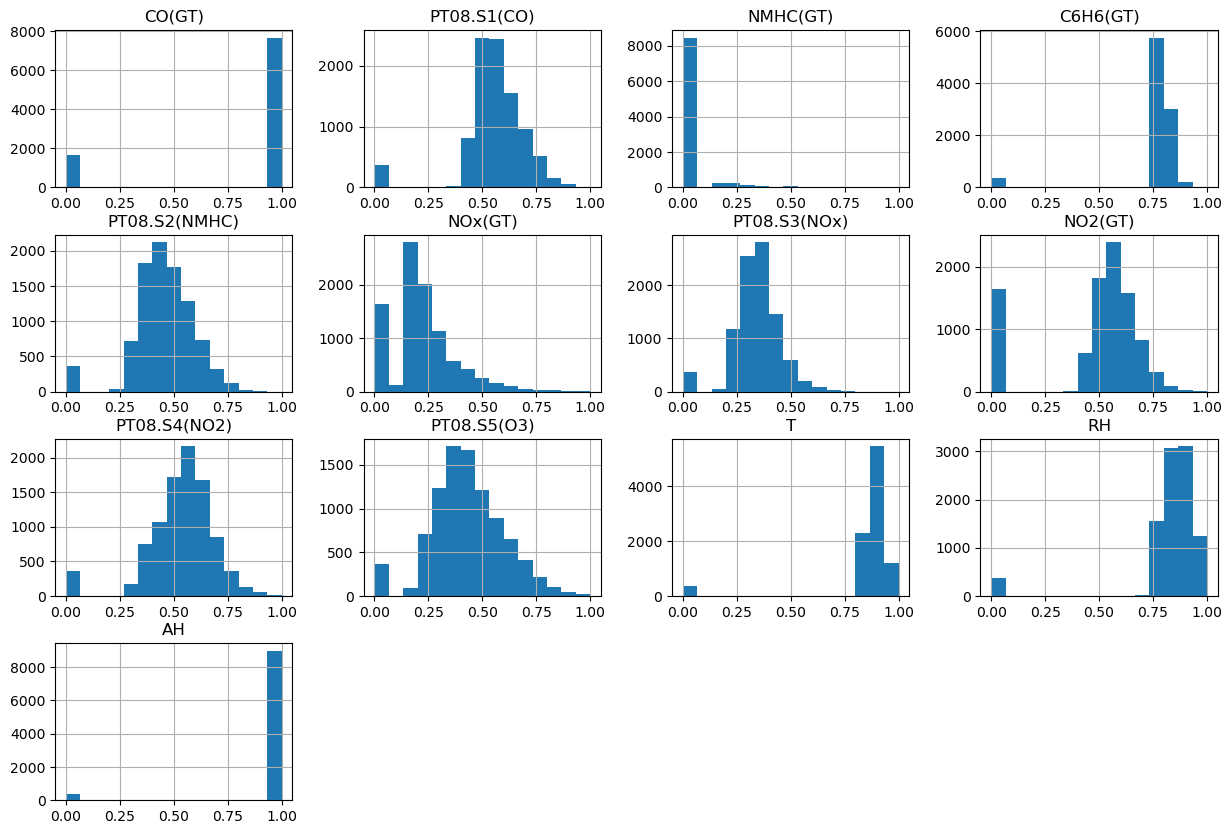

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      0.782409     0.557585     0.029453     0.765513       0.453436   
std       0.366480     0.147247     0.100640     0.156922       0.141812   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.946673     0.500446     0.000000     0.773606       0.377382   
50%       0.950920     0.559375     0.000000     0.788396       0.453604   
75%       0.956111     0.634375     0.000000     0.810011       0.540597   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean      0.219546      0.345123     0.478053      0.534951     0.431536   
std       0.153326      0.111687     0.235075      0.157045     0.167807   
min       0

In [5]:
# Plotando histogramas dos dados normalizados
dados_normalizados.hist(bins=15, figsize=(15, 10))
plt.show()

# Imprimindo estatísticas dos dados normalizados
print(dados_normalizados.describe())


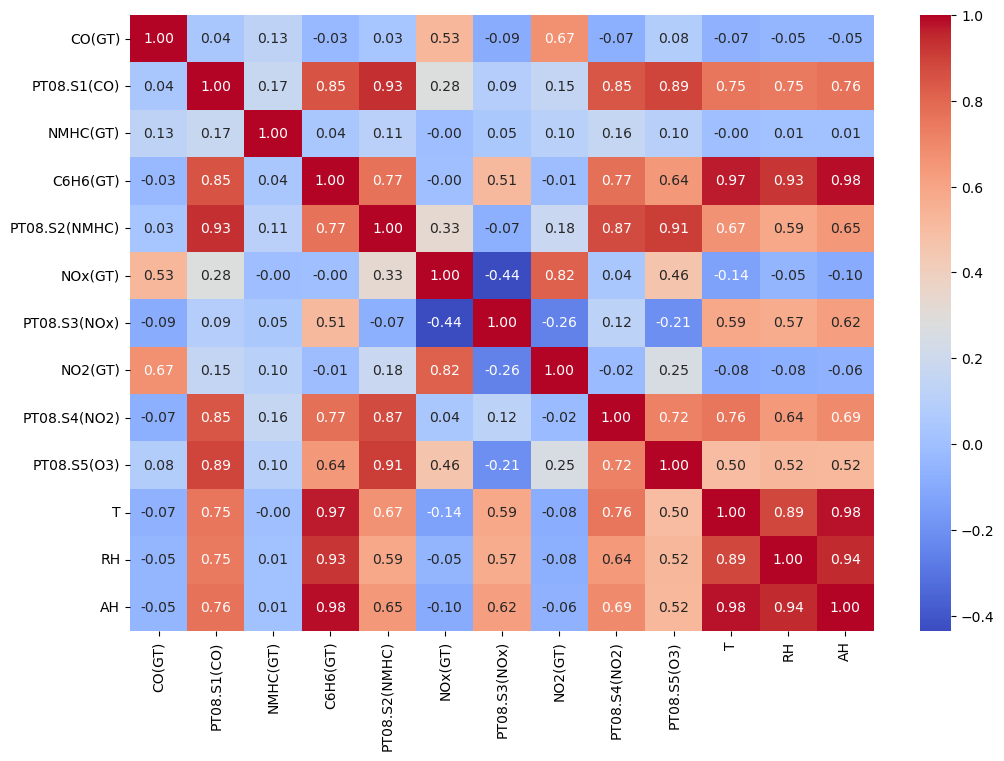

Mais correlacionadas positivamente:
 PT08.S1(CO)    PT08.S2(NMHC)    0.933102
PT08.S2(NMHC)  PT08.S1(CO)      0.933102
AH             RH               0.943995
RH             AH               0.943995
C6H6(GT)       T                0.971375
T              C6H6(GT)         0.971375
               AH               0.981001
AH             T                0.981001
C6H6(GT)       AH               0.984555
AH             C6H6(GT)         0.984555
dtype: float64

Mais correlacionadas negativamente:
 NOx(GT)       PT08.S3(NOx)   -0.436084
PT08.S3(NOx)  NOx(GT)        -0.436084
NO2(GT)       PT08.S3(NOx)   -0.256232
PT08.S3(NOx)  NO2(GT)        -0.256232
              PT08.S5(O3)    -0.208865
PT08.S5(O3)   PT08.S3(NOx)   -0.208865
NOx(GT)       T              -0.138452
T             NOx(GT)        -0.138452
NOx(GT)       AH             -0.095847
AH            NOx(GT)        -0.095847
dtype: float64

Menos correlacionadas (próximas de zero):
 NMHC(GT)  T          -0.000009
T         NMHC(GT)  

In [8]:
dados = dados[colunas_numericas]
# Matriz de Correlação
corr_matrix = dados.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Encontrando as variáveis mais e menos correlacionadas
correlacoes = corr_matrix.unstack().sort_values(kind="quicksort")

# Variáveis mais correlacionadas positiva e negativamente
print("Mais correlacionadas positivamente:\n", correlacoes[correlacoes < 1].tail(10))
print("\nMais correlacionadas negativamente:\n", correlacoes.head(10))

# Variáveis menos correlacionadas
print("\nMenos correlacionadas (próximas de zero):\n", correlacoes[correlacoes.abs().argsort()][:10])

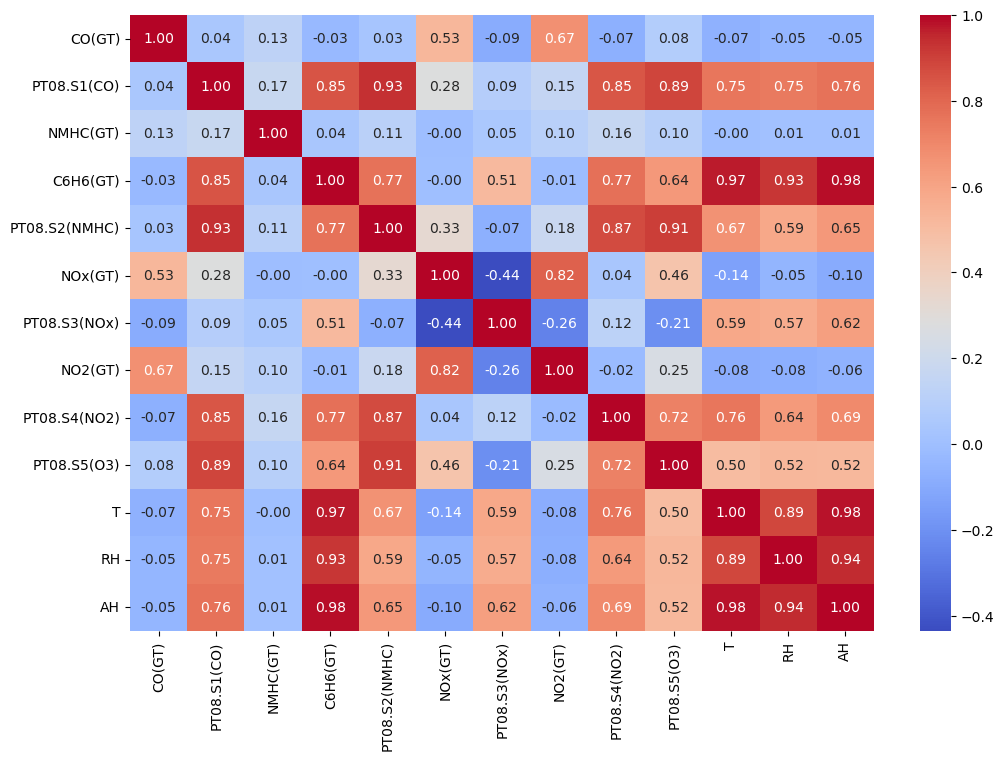

Mais correlacionadas positivamente:
 PT08.S1(CO)    PT08.S2(NMHC)    0.933102
PT08.S2(NMHC)  PT08.S1(CO)      0.933102
AH             RH               0.943995
RH             AH               0.943995
C6H6(GT)       T                0.971375
T              C6H6(GT)         0.971375
               AH               0.981001
AH             T                0.981001
C6H6(GT)       AH               0.984555
AH             C6H6(GT)         0.984555
dtype: float64

Mais correlacionadas negativamente:
 NOx(GT)       PT08.S3(NOx)   -0.436084
PT08.S3(NOx)  NOx(GT)        -0.436084
NO2(GT)       PT08.S3(NOx)   -0.256232
PT08.S3(NOx)  NO2(GT)        -0.256232
              PT08.S5(O3)    -0.208865
PT08.S5(O3)   PT08.S3(NOx)   -0.208865
NOx(GT)       T              -0.138452
T             NOx(GT)        -0.138452
NOx(GT)       AH             -0.095847
AH            NOx(GT)        -0.095847
dtype: float64

Menos correlacionadas (próximas de zero):
 NMHC(GT)  T          -0.000009
T         NMHC(GT)  

In [6]:
# Matriz de Correlação
corr_matrix = dados_normalizados.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Encontrando as variáveis mais e menos correlacionadas
correlacoes = corr_matrix.unstack().sort_values(kind="quicksort")

# Variáveis mais correlacionadas positiva e negativamente
print("Mais correlacionadas positivamente:\n", correlacoes[correlacoes < 1].tail(10))
print("\nMais correlacionadas negativamente:\n", correlacoes.head(10))

# Variáveis menos correlacionadas
print("\nMenos correlacionadas (próximas de zero):\n", correlacoes[correlacoes.abs().argsort()][:10])

C:\Users\jairo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


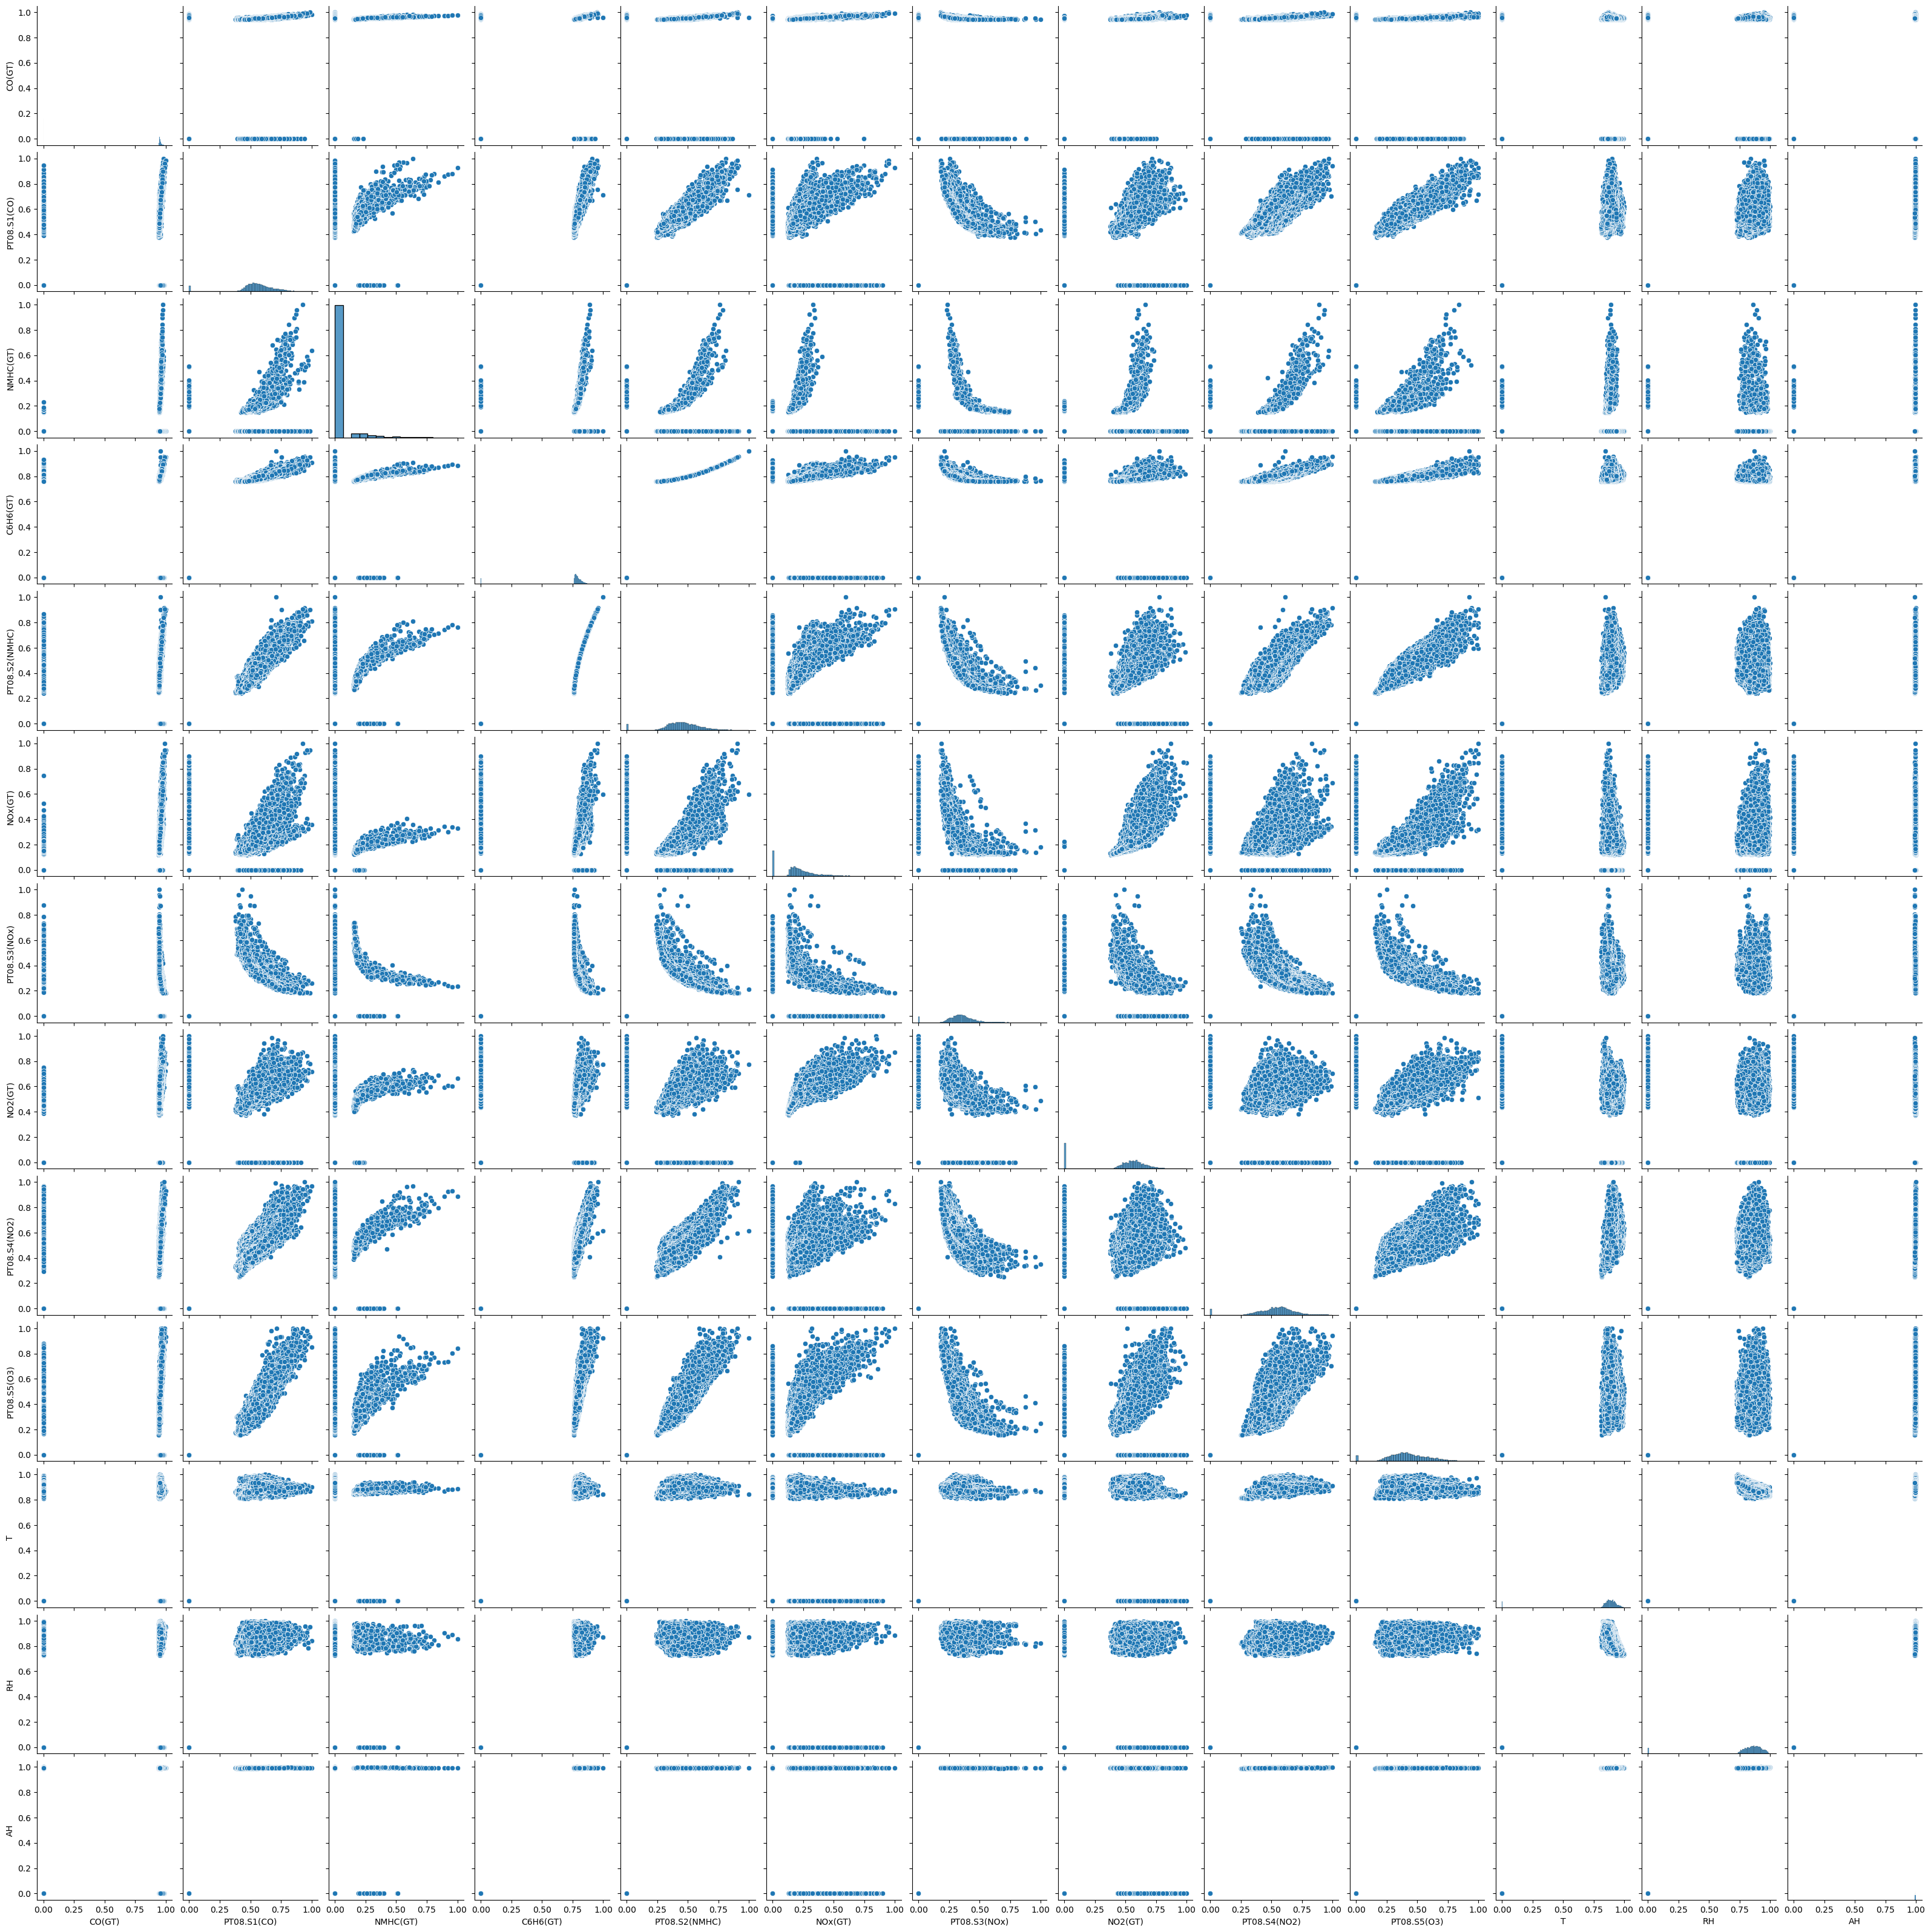

In [9]:
# Filtrando o DataFrame para incluir apenas as variáveis numéricas principais
# Se o conjunto de dados for muito grande, você pode querer limitar isso a um subconjunto de variáveis
colunas_principais = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                      'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                      'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

dados_para_pairplot = dados_normalizados[colunas_principais]

# Criando o pairplot
sns.pairplot(dados_para_pairplot)
plt.show()

In [10]:
# Definindo o target
target = dados_normalizados['C6H6(GT)']

# Definindo as features
features = dados_normalizados[['T', 'RH', 'CO(GT)', 'NOx(GT)', 'PT08.S1(CO)']]

# Verificando as primeiras linhas das features e do target
print(features.head())
print(target.head())

          T        RH    CO(GT)   NOx(GT)  PT08.S1(CO)
0  0.873262  0.862141  0.956111  0.217987     0.696429
1  0.872036  0.857984  0.953280  0.180465     0.666071
2  0.866312  0.879806  0.954224  0.197141     0.715179
3  0.862633  0.900589  0.954224  0.221560     0.703571
4  0.863451  0.899203  0.951392  0.197141     0.657143
0    0.803565
1    0.794084
2    0.792567
3    0.793326
4    0.783087
Name: C6H6(GT), dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

# Preparando os dados para a divisão
X = features
y = target

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as dimensões dos conjuntos
print("Treino (X):", X_train.shape, "Teste (X):", X_test.shape)
print("Treino (y):", y_train.shape, "Teste (y):", y_test.shape)

Treino (X): (6549, 5) Teste (X): (2808, 5)
Treino (y): (6549,) Teste (y): (2808,)


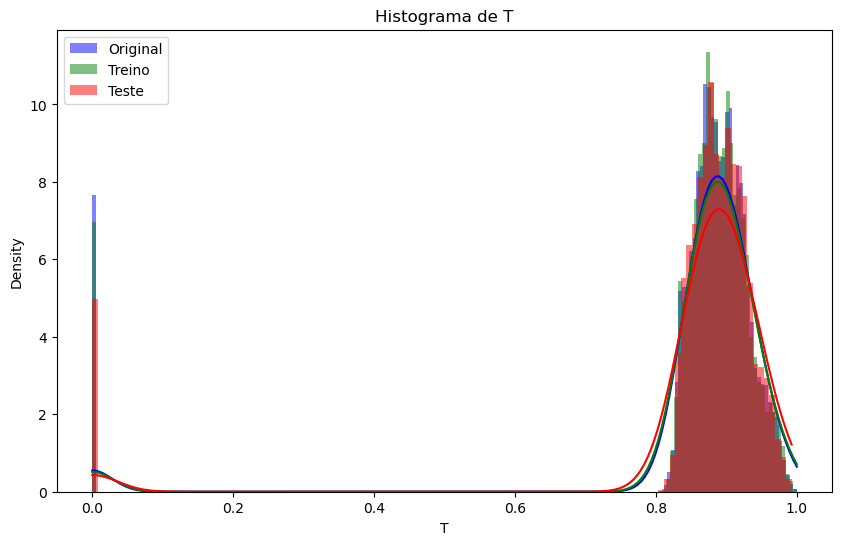

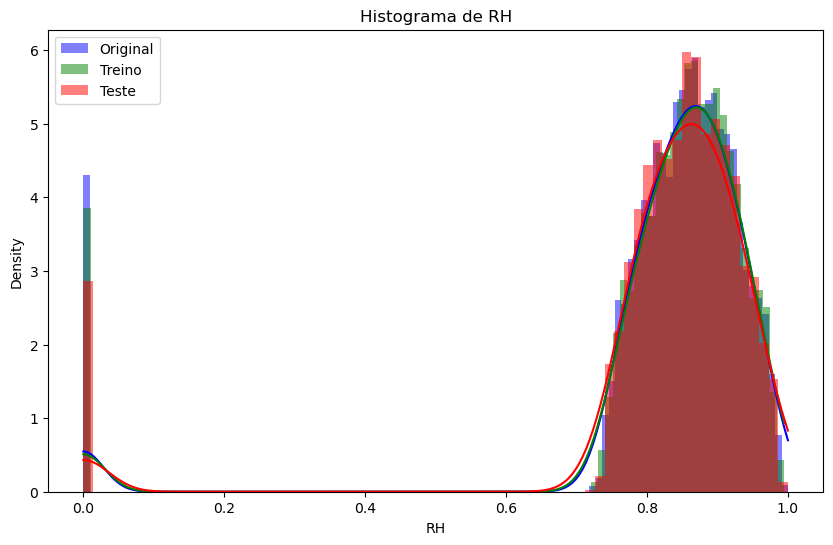

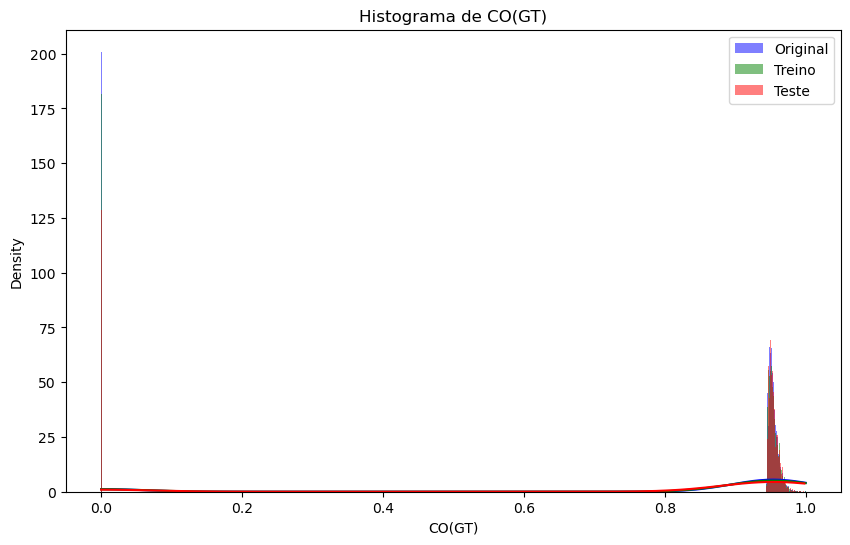

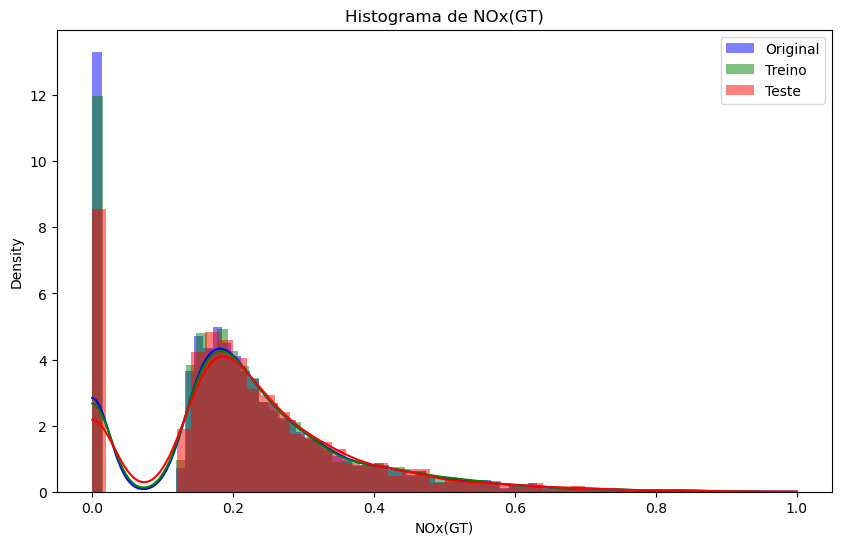

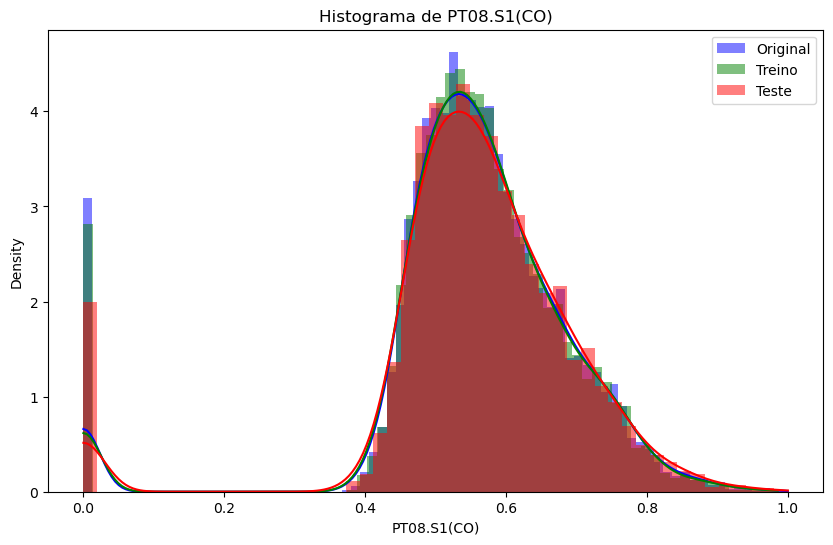

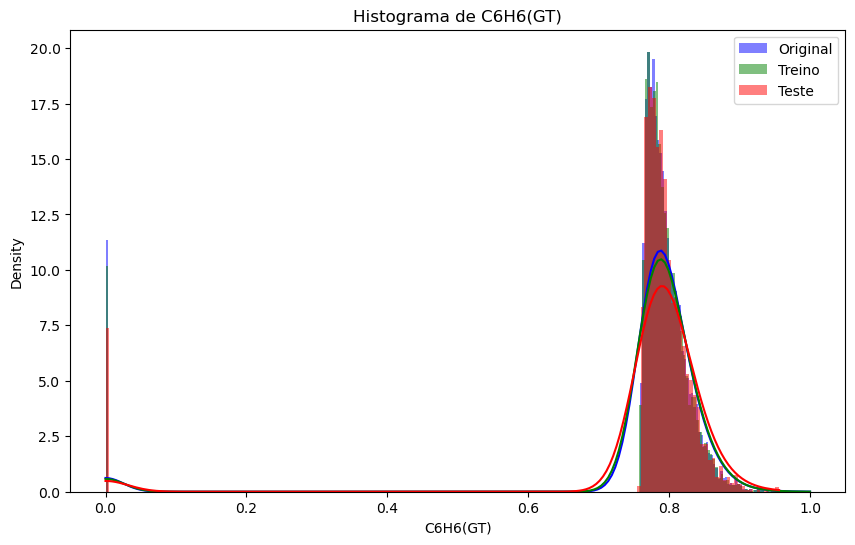

In [13]:
# Ajustando as colunas para o histograma
colunas_para_histograma = X_train.columns.tolist() + [y.name]

# Função para plotar histogramas comparativos
def plot_histograms_comparativos(data_original, data_treino, data_teste, coluna):
    plt.figure(figsize=(10, 6))
    sns.histplot(data_original[coluna], color="blue", label='Original', kde=True, stat="density", linewidth=0)
    sns.histplot(data_treino[coluna], color="green", label='Treino', kde=True, stat="density", linewidth=0)
    sns.histplot(data_teste[coluna], color="red", label='Teste', kde=True, stat="density", linewidth=0)
    plt.title(f'Histograma de {coluna}')
    plt.legend()
    plt.show()

# Plotando histogramas para as colunas selecionadas
for coluna in colunas_para_histograma:
    plot_histograms_comparativos(dados_normalizados, X_train.join(y_train), X_test.join(y_test), coluna)


In [14]:
# Salvando os datasets de treino e teste em arquivos CSV
X_train.join(y_train).to_csv('MLP_treino.csv', index=False)
X_test.join(y_test).to_csv('MLP_teste.csv', index=False)

print("Datasets salvos como MLP_treino.csv e MLP_teste.csv")

Datasets salvos como MLP_treino.csv e MLP_teste.csv


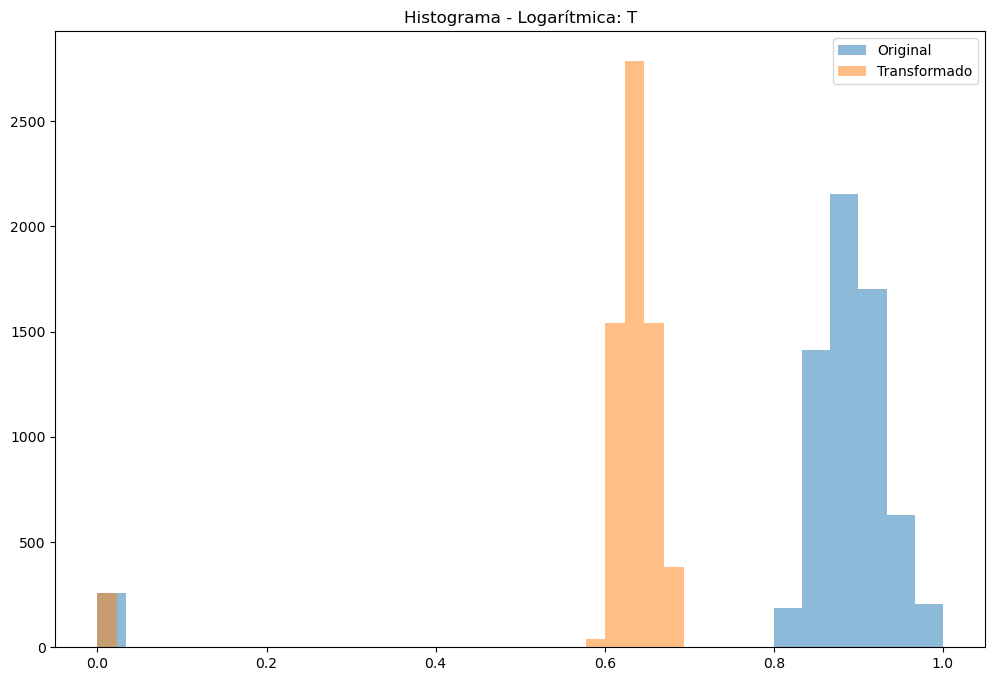

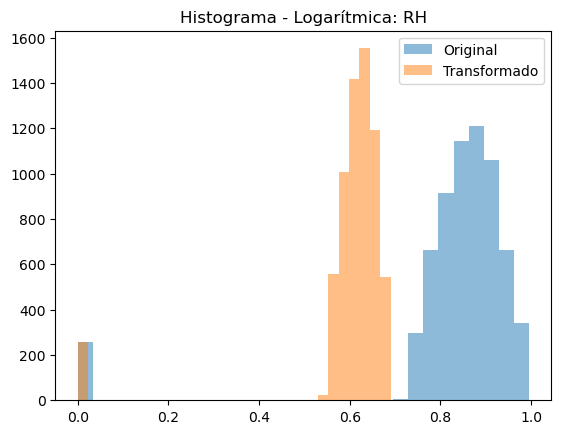

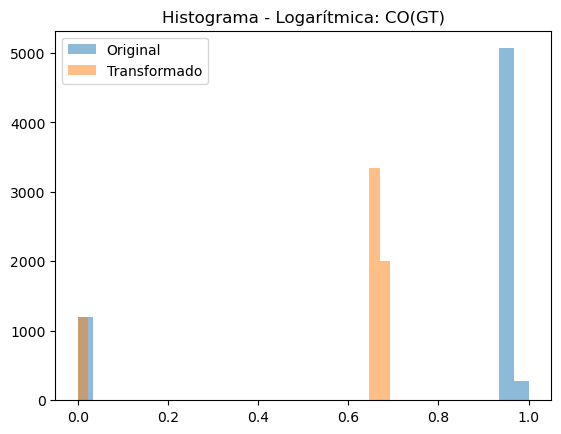

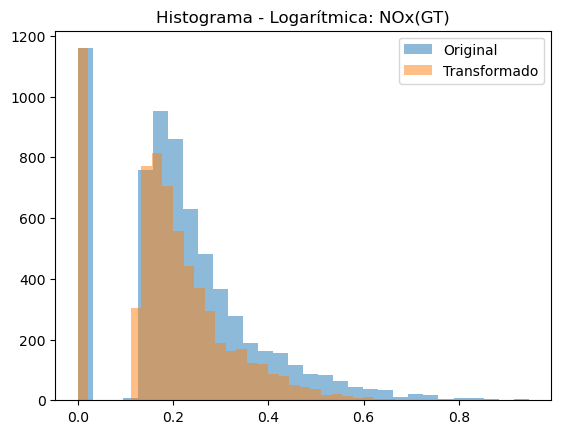

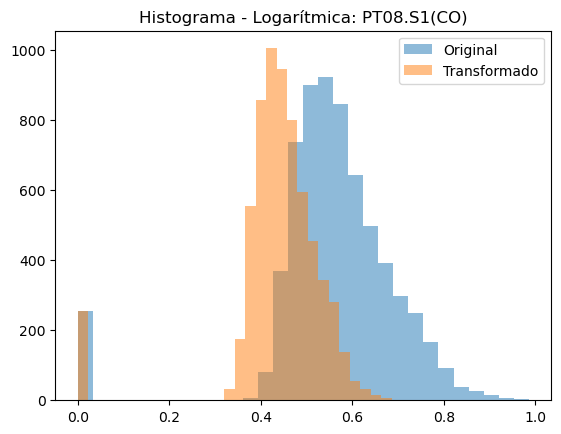

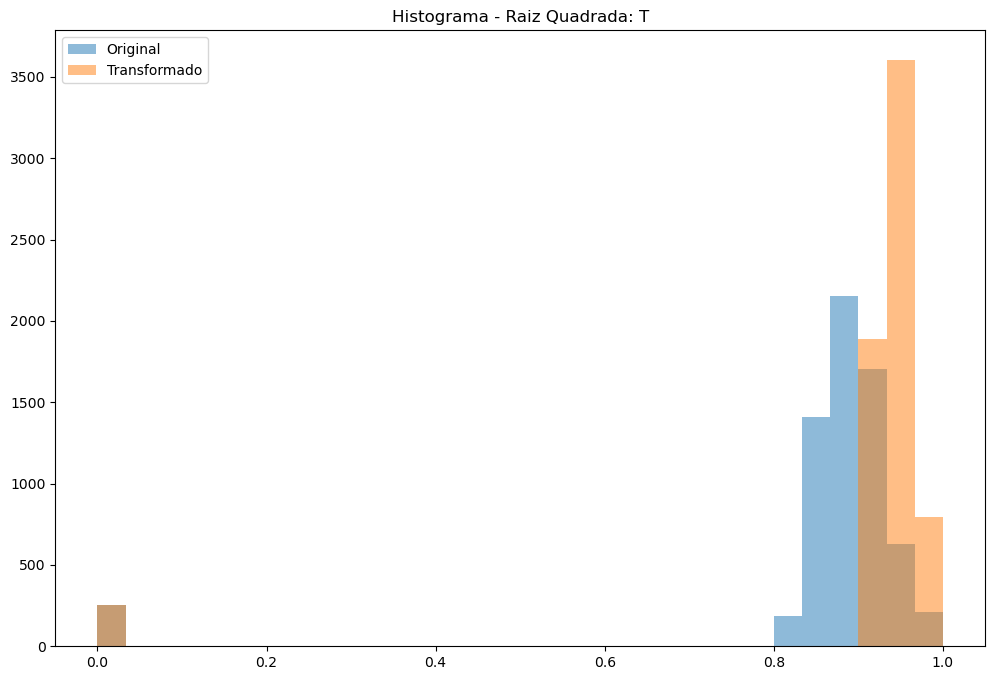

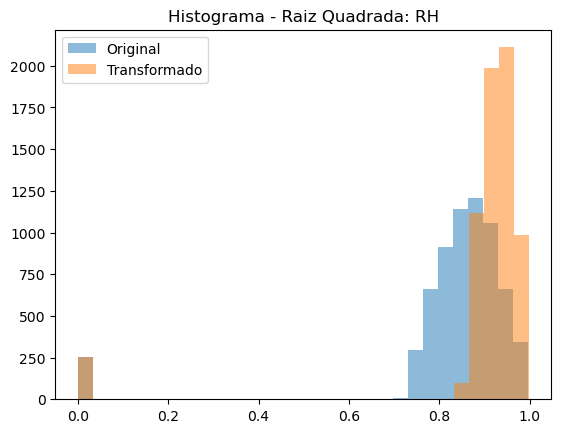

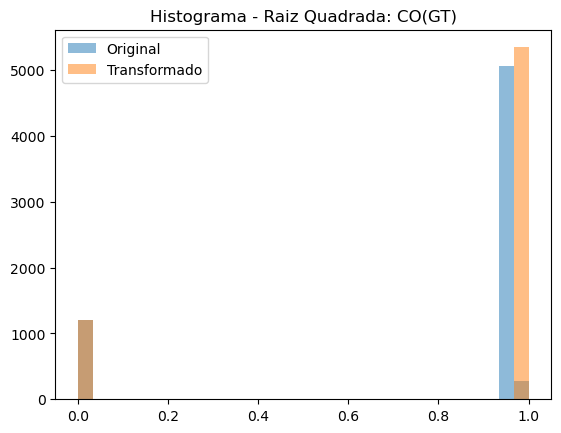

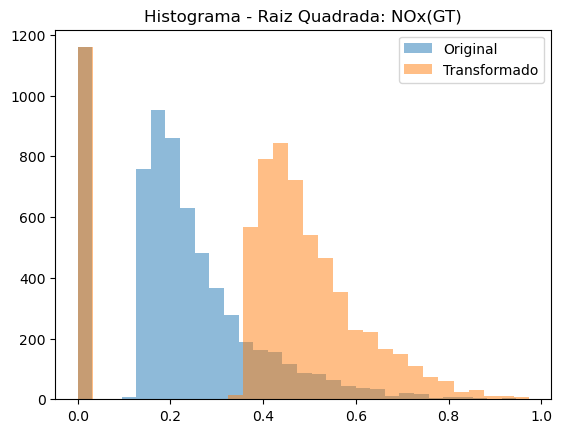

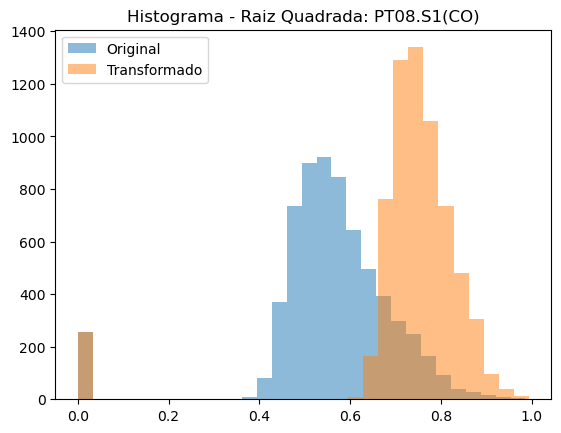

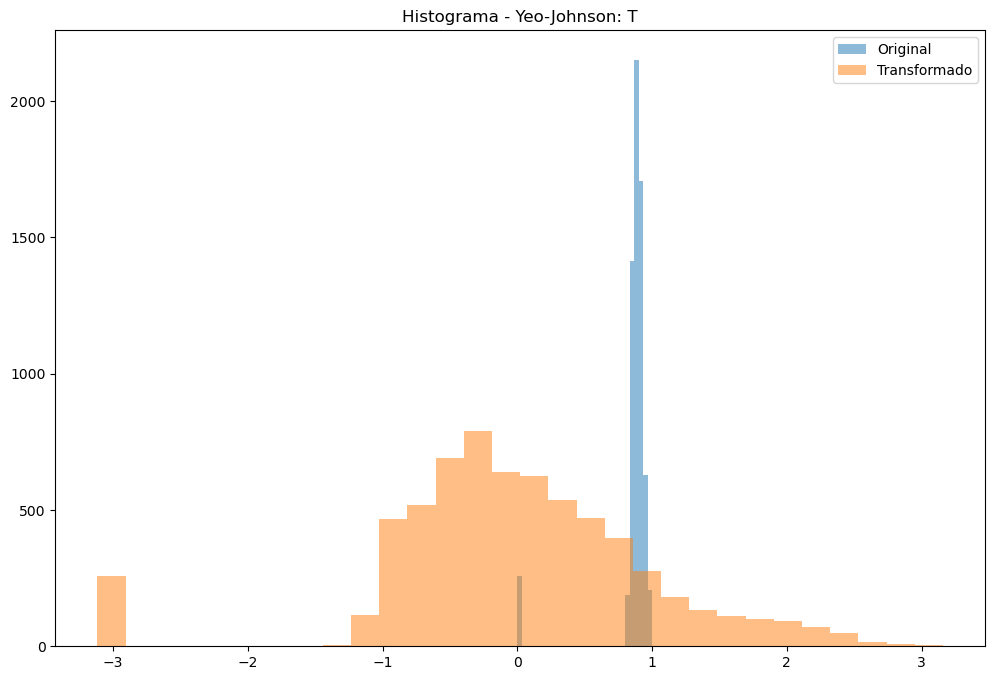

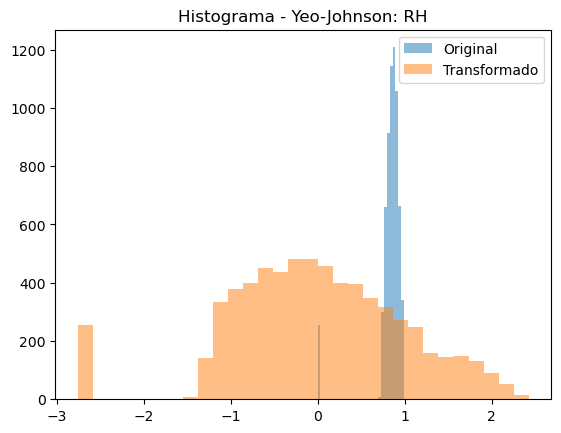

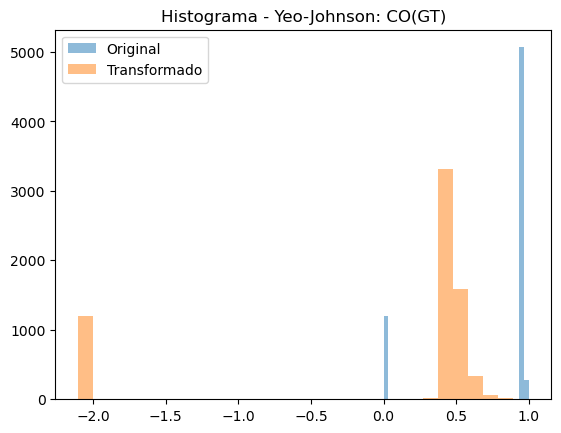

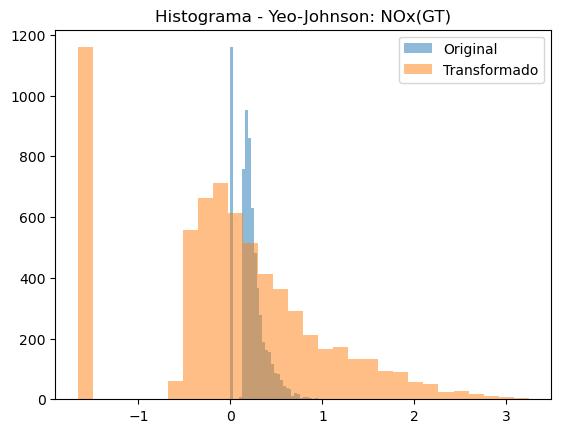

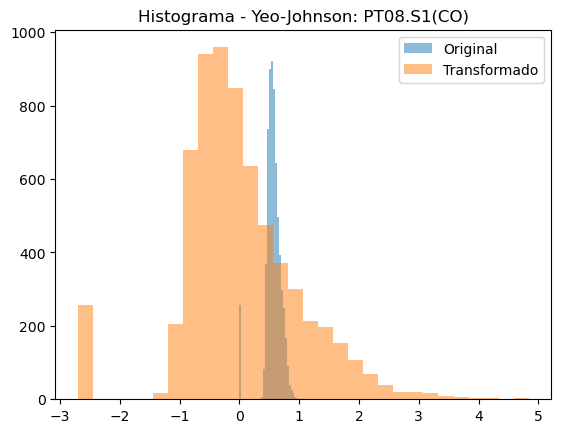

In [17]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Função para plotar histogramas comparativos
def plot_transformed_histograms(data_original, data_transformed, titulo):
    plt.figure(figsize=(12, 8))
    for coluna in data_transformed.columns:
        plt.hist(data_original[coluna], bins=30, alpha=0.5, label='Original')
        plt.hist(data_transformed[coluna], bins=30, alpha=0.5, label='Transformado')
        plt.title(f'Histograma - {titulo}: {coluna}')
        plt.legend()
        plt.show()

# Transformação Logarítmica
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

# Transformação de Raiz Quadrada
X_train_sqrt = np.sqrt(X_train)
X_test_sqrt = np.sqrt(X_test)

# Transformação Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
X_train_yj = pt.fit_transform(X_train)
X_test_yj = pt.transform(X_test)

# Convertendo os resultados das transformações de volta para DataFrame
X_train_yj = pd.DataFrame(X_train_yj, columns=X_train.columns)
X_test_yj = pd.DataFrame(X_test_yj, columns=X_test.columns)

# Plotando os histogramas
plot_transformed_histograms(X_train, X_train_log, 'Logarítmica')
plot_transformed_histograms(X_train, X_train_sqrt, 'Raiz Quadrada')
plot_transformed_histograms(X_train, X_train_yj, 'Yeo-Johnson')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
# Carregar o arquivo CSV
df = pd.read_csv('AirQuality.csv', sep=';', decimal=',')
# Remover as duas últimas colunas
df = df.iloc[:, :-2]

# Excluir colunas não numéricas antes de calcular a mediana
numeric_cols = df.select_dtypes(include=[np.number])
median_values = numeric_cols.median()

# Substituir -200 por NaN
df.replace(-200, np.nan, inplace=True)

# Remover linhas com dados faltantes
df.dropna(inplace=True)

# Dividir os dados em conjuntos de treino e teste
#treino, teste = train_test_split(df, test_size=0.3, random_state=42)

# Salvar os conjuntos de dados em arquivos CSV
#treino.to_csv('AirQuality_train.csv', index=False)
#teste.to_csv('AirQuality_test.csv', index=False)

C:\Users\jairo\AppData\Local\Temp\ipykernel_2872\1185025246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


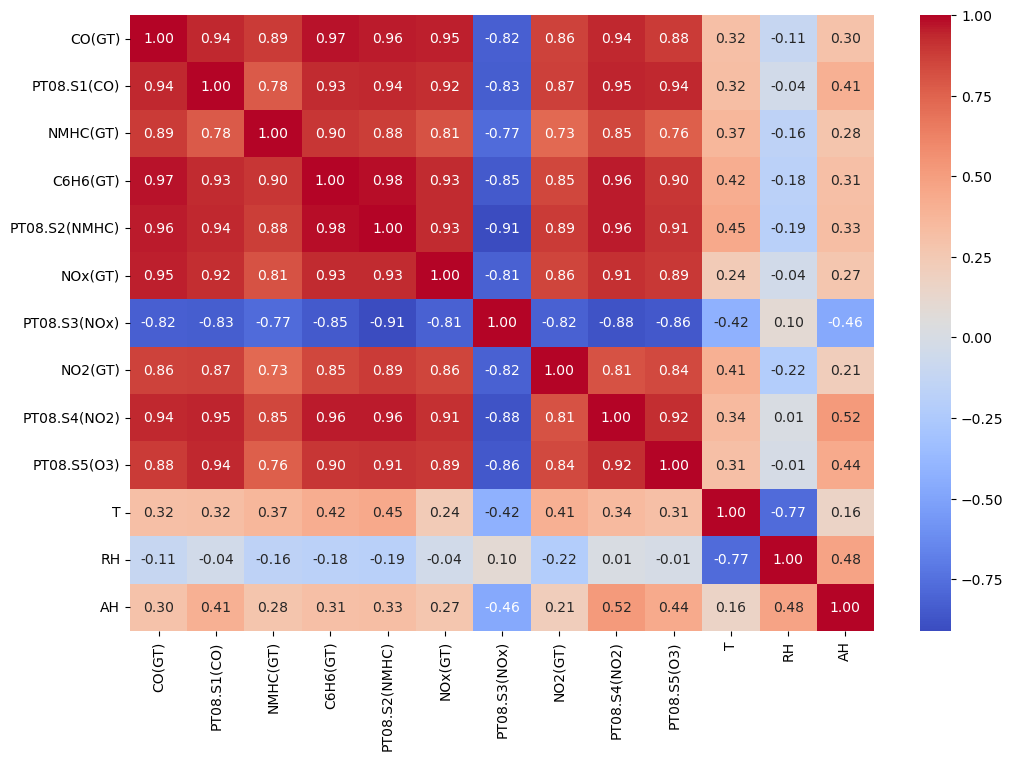

Mais correlacionadas positivamente:
 PT08.S4(NO2)   PT08.S2(NMHC)    0.957883
PT08.S2(NMHC)  PT08.S4(NO2)     0.957883
               CO(GT)           0.958426
CO(GT)         PT08.S2(NMHC)    0.958426
PT08.S4(NO2)   C6H6(GT)         0.960811
C6H6(GT)       PT08.S4(NO2)     0.960811
               CO(GT)           0.972660
CO(GT)         C6H6(GT)         0.972660
PT08.S2(NMHC)  C6H6(GT)         0.984834
C6H6(GT)       PT08.S2(NMHC)    0.984834
dtype: float64

Mais correlacionadas negativamente:
 PT08.S3(NOx)   PT08.S2(NMHC)   -0.910651
PT08.S2(NMHC)  PT08.S3(NOx)    -0.910651
PT08.S3(NOx)   PT08.S4(NO2)    -0.880213
PT08.S4(NO2)   PT08.S3(NOx)    -0.880213
PT08.S5(O3)    PT08.S3(NOx)    -0.857526
PT08.S3(NOx)   PT08.S5(O3)     -0.857526
               C6H6(GT)        -0.848850
C6H6(GT)       PT08.S3(NOx)    -0.848850
PT08.S3(NOx)   PT08.S1(CO)     -0.829577
PT08.S1(CO)    PT08.S3(NOx)    -0.829577
dtype: float64

Menos correlacionadas (próximas de zero):
 PT08.S4(NO2)  RH              0

In [8]:
# Matriz de Correlação
corr_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Encontrando as variáveis mais e menos correlacionadas
correlacoes = corr_matrix.unstack().sort_values(kind="quicksort")

# Variáveis mais correlacionadas positiva e negativamente
print("Mais correlacionadas positivamente:\n", correlacoes[correlacoes < 1].tail(10))
print("\nMais correlacionadas negativamente:\n", correlacoes.head(10))

# Variáveis menos correlacionadas
print("\nMenos correlacionadas (próximas de zero):\n", correlacoes[correlacoes.abs().argsort()][:10])

In [10]:
# Selecionando as colunas desejadas
selected_columns = ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'T', 'RH']
df_selected = df_scaled_0_1[selected_columns]

# Plotando histogramas das colunas selecionadas
df_selected.hist(bins=15, figsize=(15, 10))
plt.show()

NameError: name 'df_scaled_0_1' is not defined